In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

In [3]:
year = 2021
locate = "강남구"


def population(year, locate):
    df = pd.read_csv(r"./data/주민등록인구_20230710130833.csv", header=0, index_col="동별(2)")
    df.drop(columns="동별(1)", inplace=True)
    df.drop(index="동별(2)", inplace=True)
    df.drop(index="소계", inplace=True)
    return df[str(year)][str(locate)]


def parkinglot(year, locate):
    df = pd.read_csv(r"./data/주택가+주차장_20230710095648.csv", header=0, index_col="자치구별(2)")
    df.drop(columns='자치구별(1)',inplace=True)
    return df[str(year)+'.5'][locate]

def house_price(year,locate):
    df=pd.read_csv(r'data/주택가격지수(매매)_20230710095430.csv',header=0)
    tmp=df.loc[df['시점'] == year].loc[df['자치구별(2)']==locate,'종합'].values
    return float(tmp)
def fire_count(year,locate):
    df=pd.read_csv(r'data/화재발생+현황_20230710145224.csv',index_col='동별(2)')
    df.drop(columns='동별(1)',inplace=True)
    tmp=df[str(year)][str(locate)]
    return tmp
def fire_price(year,locate):
    df=pd.read_csv(r'data/화재발생+현황_20230710145224.csv',index_col='동별(2)')
    df.drop(columns='동별(1)',inplace=True)
    tmp=df[str(year)+'.1'][str(locate)]
    return tmp



tmp=(fire_price(year,locate))
tmp

'1354949'

In [4]:
def business(year,locate,KindOfbusiness,KindOfData):
    df=pd.read_csv(r'data/사업체현황(산업대분류별_동별)(2017년+이후)_20230710103735.csv',header=None)

    # df=df.loc[df[4]="소계"]
    df.iloc[0][1]='년도'
    df.iloc[1][1]='합계'
    df.iloc[2][1]='업종'
    df.iloc[3][1]='통계종류'

    df=df.T
    df.drop(columns=[1,5],inplace=True)

    row = df.iloc[1]  # Select the row to use as column names
    df = df[2:]  # Remove the row from the DataFrame
    df = df.set_axis(row, axis='columns')  # Set the row as column names
    # tmp=df.head(20)
    tmp=(int(df.loc[df['년도']==str(year)].loc[df['업종']==KindOfbusiness].loc[df['동별(2)']=='소계'].loc[df['통계종류']==KindOfData,locate].values))
    return tmp

def business_ratio(year,locate,KindOfbusiness,KindOfData):
    return business(year,locate,KindOfbusiness,KindOfData)/business(year,locate,'소계',KindOfData)*100
    
(business_ratio(2021,'강남구','제조업','사업체수'))
# business(2017,'강남구','제조업','사업체수')

2.75164307725872

In [5]:
def metro(year,locate):
    import pandas as pd
    import csv

    # 추출할 역명 리스트
    # 추출할 인덱스 리스트
    station_list = [
        "압구정",
        "압구정로데오",
        "신사",
        "논현",
        "신논현",
        "강남",
        "양재",
        "매봉",
        "한티",
        "선릉",
        "학동",
        "언주",
        "매봉",
        "대치",
        "도곡",
        "개포동",
        "대청",
        "일원",
        "수서",
        "봉은사",
        "청담",
    ]
    station_list2 = ["온수", "개봉", "구로", "신도림"]
    input_file = "data/CARD_SUBWAY_MONTH_%d.csv" % year
    output_file = "data/CARD_SUBWAY_MONTH_%d_fixed.csv" % year

    print(input_file)
    with open(input_file, "r", encoding="euc-kr") as f_in, open(
        output_file, "w", newline="", encoding="euc-kr"
    ) as f_out:
        reader = csv.reader(f_in)
        writer = csv.writer(f_out)

        for row in reader:
            if len(row) > 7:
                # Split the row into two rows
                row1 = row[:7]
                row2 = row[7:]
                writer.writerow(row1)
                writer.writerow(row2)
            else:
                writer.writerow(row)
        # 데이터 불러오기
    subway = pd.read_csv(
        output_file, encoding="euc-kr", index_col=False
    )
    subway_df = subway.drop("등록일자", axis=1)
    subway_df.set_index("역명", inplace=True)
    subway_df = subway_df.drop("사용일자", axis=1)
    subway_sum = subway_df.groupby("역명").sum()

    # 역명을 포함한 열 추출
    filtered_data1 = subway_sum[subway_sum.index.isin(station_list)]

    # 필요한 열만 선택  
    extracted_data1 = filtered_data1[["승차총승객수", "하차총승객수"]]  
    # 역명을 포함한 열 추출
    filtered_data2 = subway_sum[subway_sum.index.isin(station_list2)]

    # 필요한 열만 선택
    extracted_data2 = filtered_data2[["승차총승객수", "하차총승객수"]]
    filtered_data1["지역구"] = "강남"

    # 필요한 열만 선택
    if locate=='강남구':
        extracted_data1 = filtered_data1[["지역구", "승차총승객수", "하차총승객수"]]
        extracted_data1.set_index("지역구",inplace=True)
        extracted_data_df1 = extracted_data1.groupby("지역구").sum()
        tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))
        return tmp

    if locate=='구로구':
        filtered_data2["지역구"] = "구로"
        # 필요한 열만 선택
        extracted_data2 = filtered_data2[["지역구", "승차총승객수", "하차총승객수"]]
        extracted_data2.set_index("지역구", inplace=True)
        extracted_data_df2 = extracted_data2.groupby("지역구").sum()
        tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))
        return tmp


In [6]:
#calc gap
pop_gap=[]
business_gap=[]
jobs_gap=[]
house_gap=[]
parkinglot_gap=[]
fire_count_gap=[]
fire_price_gap=[]
metro_gap=[]

yeardata = []

for year in range(2017, 2022):
    yeardata.append(year)
    pop_gap.append((int(population(year, '강남구')))-(int(population(year, '구로구'))))
    business_gap.append((int(business(year,'강남구','소계','사업체수')))-(int(business(year,'구로구','소계','사업체수'))))
    jobs_gap.append((int(business(year,'강남구','소계','종사자수')))-(int(business(year,'구로구','소계','종사자수'))))
    house_gap.append((float(house_price(year,'강남구')))-(float(house_price(year,'구로구'))))
    parkinglot_gap.append(float(parkinglot(year,'강남구'))-float(parkinglot(year,'구로구')))
    fire_count_gap.append(int(fire_count(year,'강남구'))-int(fire_count(year,'구로구')))
    #fire_price_gap.append(int(fire_price(year,'강남구'))-int(fire_price(year,'구로구')))
    metro_gap.append(metro(year,'강남구')-metro(year,'구로구'))

data = {'year': yeardata,
        'pop_gap': pop_gap,
        'business_gap': business_gap,
        'jobs_gap': jobs_gap,
        'house_gap': house_gap,
        'parkinglot_gap': parkinglot_gap,
        'fire_count_gap': fire_count_gap,
        #'fire_price_gap': fire_price_gap,
        'metro_gap': metro_gap}

gap_df = pd.DataFrame(data)

gap_df.set_index('year', inplace=True)
gap_df



data/CARD_SUBWAY_MONTH_2017.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2017.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

data/CARD_SUBWAY_MONTH_2018.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2018.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

data/CARD_SUBWAY_MONTH_2019.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2019.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

data/CARD_SUBWAY_MONTH_2020.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2020.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

data/CARD_SUBWAY_MONTH_2021.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2021.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,pop_gap,business_gap,jobs_gap,house_gap,parkinglot_gap,fire_count_gap,metro_gap
year,,,,,,,
2017,119493,34106,465579,1.1,-3.6,242,256314882
2018,108967,32820,476066,4.1,-4.3,173,262915112
2019,110838,32271,473172,4.9,-5.8,209,274280814
2020,111567,61507,599278,1.8,-8.3,231,212142356
2021,116637,57216,560730,2.0,-8.8,218,213721070


In [9]:
pop_gap=[]
business_gap=[]
jobs_gap=[]
house_gap=[]
parkinglot_gap=[]
fire_count_gap=[]
fire_price_gap=[]
metro_gap=[]

yeardata = []

for year in range(2017, 2022):
    yeardata.append(year)
    pop_gap.append((int(population(year, '강남구')))-(int(population(year, '구로구'))))
    business_gap.append((int(business(year,'강남구','소계','사업체수')))-(int(business(year,'구로구','소계','사업체수'))))
    jobs_gap.append((int(business(year,'강남구','소계','종사자수')))-(int(business(year,'구로구','소계','종사자수'))))
    house_gap.append((float(house_price(year,'강남구')))-(float(house_price(year,'구로구'))))
    parkinglot_gap.append(float(parkinglot(year,'강남구'))-float(parkinglot(year,'구로구')))
    fire_count_gap.append(int(fire_count(year,'강남구'))-int(fire_count(year,'구로구')))
   # fire_price_gap.append(int(fire_price(year,'강남구'))-int(fire_price(year,'구로구')))
    metro_gap.append(metro(year,'강남구')-metro(year,'구로구'))

data = {'year': yeardata,
        'pop_gap': pop_gap,
        'business_gap': business_gap,
        'jobs_gap': jobs_gap,
        'house_gap': house_gap,
        'parkinglot_gap': parkinglot_gap,
        'fire_count_gap': fire_count_gap,
        #'fire_price_gap': fire_price_gap,
        'metro_gap': metro_gap}

gap_df = pd.DataFrame(data)

gap_df.set_index('year', inplace=True)
# newdata=[]

# print(gap_df)
# for i in yeardata:
#     if i != 2017:
#         newdata.append(gap_df[int(i)]-gap_df[int(i)-1])/gap_df[int(i)-1]*100

# newdata=pd.DataFrame(newdata,index=[18,19,20,21])
# newdata

print(gap_df)

year_gap_df = gap_df.diff()
year_gap_df = (year_gap_df / gap_df.shift() * 100).round(2)
year_gap_df = year_gap_df.dropna()

year_gap_df

data/CARD_SUBWAY_MONTH_2017.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2017.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

data/CARD_SUBWAY_MONTH_2018.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2018.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

data/CARD_SUBWAY_MONTH_2019.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2019.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

data/CARD_SUBWAY_MONTH_2020.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2020.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

data/CARD_SUBWAY_MONTH_2021.csv


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"


data/CARD_SUBWAY_MONTH_2021.csv
      pop_gap  business_gap  jobs_gap  house_gap  parkinglot_gap  \
year                                                               
2017   119493         34106    465579        1.1            -3.6   
2018   108967         32820    476066        4.1            -4.3   
2019   110838         32271    473172        4.9            -5.8   
2020   111567         61507    599278        1.8            -8.3   
2021   116637         57216    560730        2.0            -8.8   

      fire_count_gap  metro_gap  
year                             
2017             242  256314882  
2018             173  262915112  
2019             209  274280814  
2020             231  212142356  
2021             218  213721070  


C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subway_sum = subway_df.groupby("역명").sum()
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
C:\Users\sh584\AppData\Local\Temp\ipykernel_11028\1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,pop_gap,business_gap,jobs_gap,house_gap,parkinglot_gap,fire_count_gap,metro_gap
year,,,,,,,
2018,-8.81,-3.77,2.25,272.73,19.44,-28.51,2.58
2019,1.72,-1.67,-0.61,19.51,34.88,20.81,4.32
2020,0.66,90.60,26.65,-63.27,43.10,10.53,-22.66
2021,4.54,-6.98,-6.43,11.11,6.02,-5.63,0.74


In [10]:
import scipy.stats as stats

# year_gap_df가 'house_gap'을 포함한 독립 변수와 종속 변수의 데이터프레임이라고 가정합니다.

# 'house_gap'과 다른 변수들 간의 상관 계수와 p-value 계산
correlation_coefficients = {}
p_values = {}
dependent_variable = 'house_gap'

for column in year_gap_df.columns:
    if column != dependent_variable:
        correlation, p_value = stats.pearsonr(year_gap_df[column], year_gap_df[dependent_variable])
        correlation_coefficients[column] = correlation
        p_values[column] = p_value

# 결과 출력
for variable, correlation in correlation_coefficients.items():
    p_value = p_values[variable]
    print(f'{variable} vs {dependent_variable}:')
    print(f'Correlation: {correlation}')
    print(f'p-value: {p_value}')
    print('')

pop_gap vs house_gap:
Correlation: -0.881720932388586
p-value: 0.11827906761141405

business_gap vs house_gap:
Correlation: -0.5544134494120864
p-value: 0.44558655058791363

jobs_gap vs house_gap:
Correlation: -0.3849117646179575
p-value: 0.6150882353820425

parkinglot_gap vs house_gap:
Correlation: -0.39852047282071357
p-value: 0.6014795271792864

fire_count_gap vs house_gap:
Correlation: -0.8387225362382424
p-value: 0.16127746376175756

metro_gap vs house_gap:
Correlation: 0.5611433524572307
p-value: 0.4388566475427693



pop_gap - house_gap:
Slope: -22.30819674735124
Intercept: 49.47937703687653
R-value: -0.881720932388586
P-value: 0.11827906761141405
Standard Error: 8.440144289820026

business_gap - house_gap:
Slope: -1.7140311993643813
Intercept: 93.52073979157683
R-value: -0.5544134494120865
P-value: 0.4455865505879135
Standard Error: 1.819362660807964

jobs_gap - house_gap:
Slope: -3.8709568431390102
Intercept: 81.17477914775469
R-value: -0.3849117646179574
P-value: 0.6150882353820426
Standard Error: 6.563294757486808

parkinglot_gap - house_gap:
Slope: -3.5481591305844455
Intercept: 151.77539511691378
R-value: -0.3985204728207135
P-value: 0.6014795271792865
Standard Error: 5.774073308316899

fire_count_gap - house_gap:
Slope: -5.719646532909627
Intercept: 56.016247426963254
R-value: -0.8387225362382424
P-value: 0.16127746376175744
Standard Error: 2.6259159580374805

metro_gap - house_gap:
Slope: 6.483899201953693
Intercept: 84.36704150333611
R-value: 0.5611433524572307
P-value: 0.4388566475427693


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

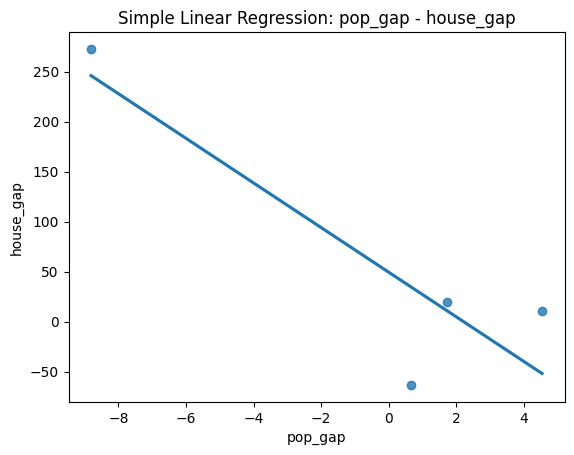

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

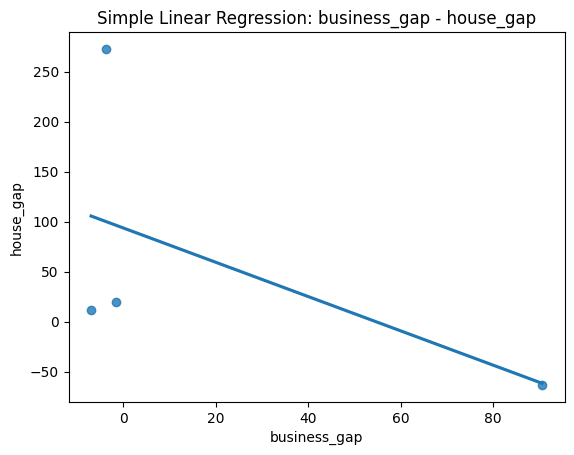

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

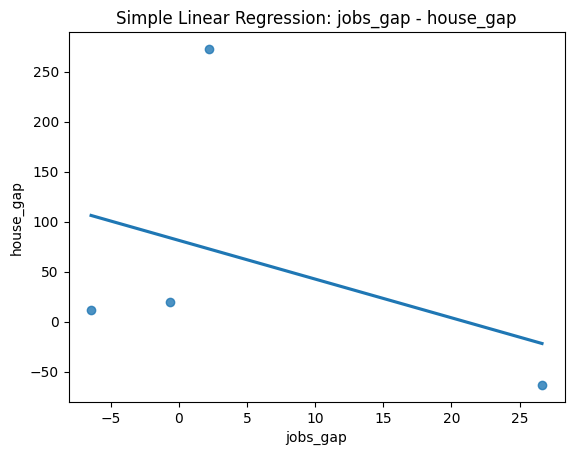

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

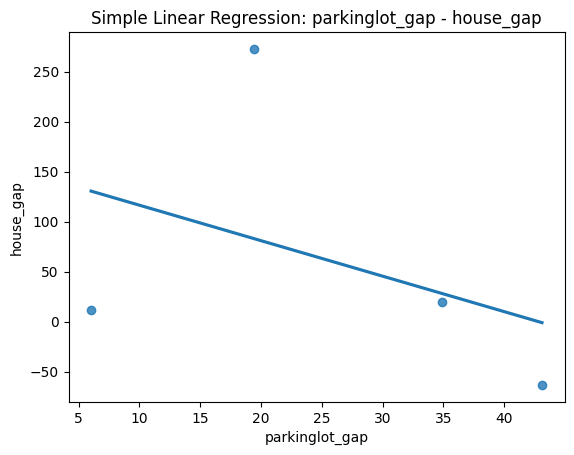

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

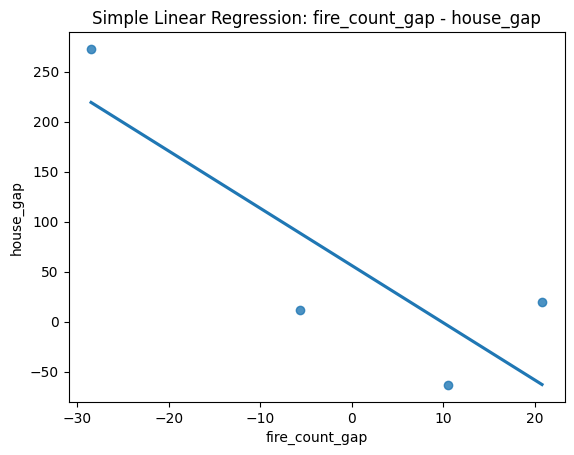

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

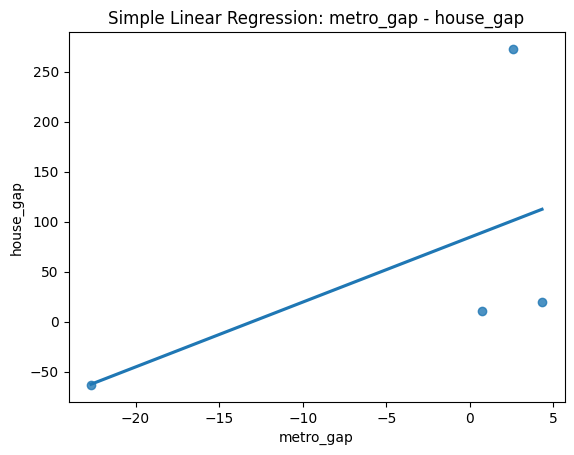

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# year_gap_df가 단순 선형 상관분석을 수행한 결과인 데이터프레임이라고 가정합니다.

# 독립 변수 리스트
independent_variables = ['pop_gap', 'business_gap', 'jobs_gap', 'parkinglot_gap', 'fire_count_gap', 'metro_gap']

# 각 독립 변수 별로 단순 선형 회귀 분석 및 그래프 그리기
for variable in independent_variables:
    plt.figure()
    sns.regplot(x=year_gap_df[variable], y=year_gap_df['house_gap'], ci=None)
    plt.xlabel(variable)
    plt.ylabel('house_gap')
    plt.title(f'Simple Linear Regression: {variable} - house_gap')

    # 단순 선형 회귀 분석 수행
    slope, intercept, r_value, p_value, std_err = linregress(year_gap_df[variable], year_gap_df['house_gap'])
    print(f'{variable} - house_gap:')
    print(f'Slope: {slope}')
    print(f'Intercept: {intercept}')
    print(f'R-value: {r_value}')
    print(f'P-value: {p_value}')
    print(f'Standard Error: {std_err}')
    print('')

plt.show()

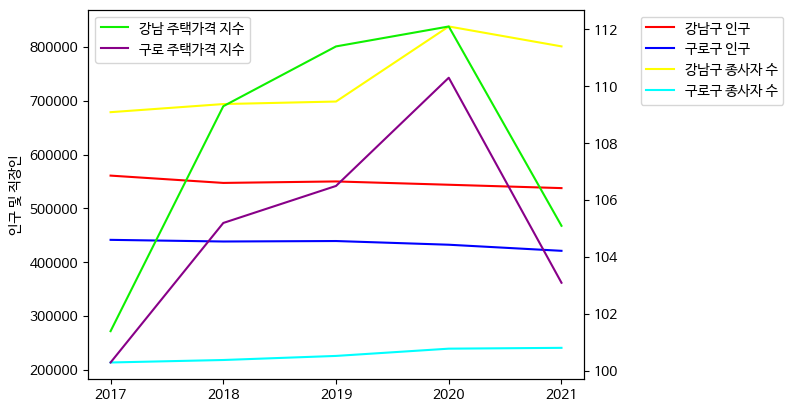

In [34]:
gangnampop = []
guro_pop = []
gangnam_business=[]
guro_business=[]
gangnam_jobs=[]
guro_jobs=[]
gangnam_house=[]
guro_house=[]

for year in range(2017, 2022):
    gangnampop.append(int(population(year, '강남구')))
    guro_pop.append(int(population(year, '구로구')))
    gangnam_business.append(int(business(year,'강남구','소계','사업체수')))
    guro_business.append(int(business(year,'구로구','소계','사업체수')))
    gangnam_jobs.append(int(business(year,'강남구','소계','종사자수')))
    guro_jobs.append(int(business(year,'구로구','소계','종사자수')))
    gangnam_house.append(float(house_price(year,'강남구')))
    guro_house.append(float(house_price(year,'구로구')))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(yeardata, gangnampop, label='강남구 인구', color='#FF0000')
ax1.plot(yeardata, guro_pop, label='구로구 인구', color='#0000FF')

ax1.plot(yeardata, gangnam_jobs, label='강남구 종사자 수', color='#FFFF00')
ax1.plot(yeardata, guro_jobs, label='구로구 종사자 수', color='#00FFFF')

ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수',color='#0FF000')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수',color='#880088')

ax2.legend(loc='best')

ax1.set_ylabel('인구 및 직장인')
# ax2.set_ylabel('직장 수')

ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

plt.xticks(range(min(yeardata), max(yeardata)+1, 1))
plt.show()






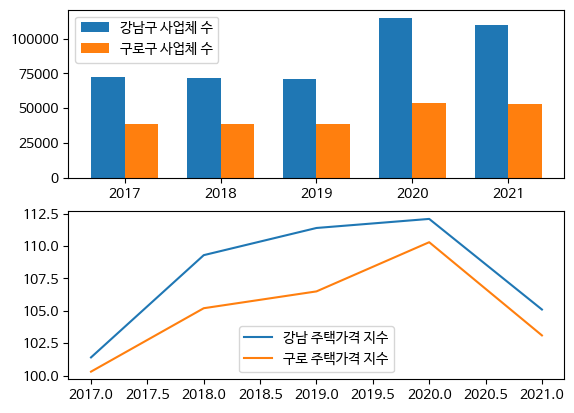

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)

bar_width = 0.35
x_pos = np.arange(len(yeardata))

ax1.bar(x_pos - bar_width/2, gangnam_business, bar_width, label='강남구 사업체 수')
ax1.bar(x_pos + bar_width/2, guro_business, bar_width, label='구로구 사업체 수')
ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(yeardata)
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()



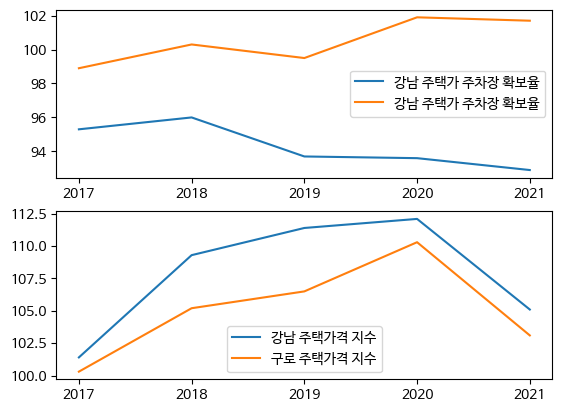

In [36]:
poppark_gangnam=[]
poppark_guro=[]
for year in range(2017,2022,1):
    poppark_gangnam.append(float(parkinglot(year,'강남구')))
    poppark_guro.append(float(parkinglot(year,'구로구'))) 

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)


ax1.plot(yeardata,poppark_gangnam,label='강남 주택가 주차장 확보율')
ax1.plot(yeardata,poppark_guro,label='강남 주택가 주차장 확보율')
ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수')

ax1.set_xticks(range(min(yeardata), max(yeardata)+1, 1))
ax2.set_xticks(range(min(yeardata), max(yeardata)+1, 1))

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

상관 계수: -0.1834700959670848
p-value: 0.3800135160882236


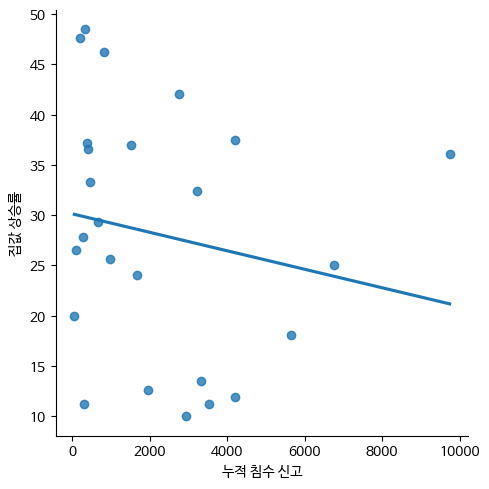

In [37]:
data = pd.read_excel('data/(2006_2022)순위_서울시 466개 법정동 주택침수건수.xlsx')
data.head()

#필요없는 칼럼 지우기
data = data.drop(['순위', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
data['시군구'].unique()


def house_price_all(locate):
    df=pd.read_csv('data/주택가격지수(매매)_20230710095430.csv',header=0)
    tmp=df.loc[df['시점'] == 2022].loc[df['자치구별(2)']==locate,'종합'].values
    tmp_1=df.loc[df['시점'] == 2006].loc[df['자치구별(2)']==locate,'종합'].values
    growth = (int(tmp) - int(tmp_1)) / int(tmp_1) * 100
    return float(growth)

def flooding(locate):
    data = pd.read_excel('data/(2006_2022)순위_서울시 466개 법정동 주택침수건수.xlsx')
    data = data.drop(['순위', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
    locate1 = locate
    data=data[data['시군구']==locate1]
    sum_data=data['침수주택 건수(건)'].sum()
    return sum_data
                   
gu=['관악구', '영등포구', '동작구', '양천구', '강서구', '서초구', '구로구', '금천구', '강남구',
       '강동구', '광진구', '은평구', '송파구', '강북구', '서대문구', '마포구', '중랑구', '도봉구',
       '성북구', '동대문구', '노원구', '성동구', '용산구', '중구', '종로구']

data1=[]
for i in gu:
    data1.append([house_price_all(i), flooding(i)])
   

columns = ['집값 상승률', '누적 침수 신고']
index = gu
df=pd.DataFrame(data1, index = index, columns= columns)

sns.lmplot(x='누적 침수 신고', y='집값 상승률', data=df, ci=None)

from sklearn.linear_model import LinearRegression
from scipy import stats

corr, p_value = stats.pearsonr(df['누적 침수 신고'], df['집값 상승률'])
print(f"상관 계수: {corr}") 
print(f"p-value: {p_value}")


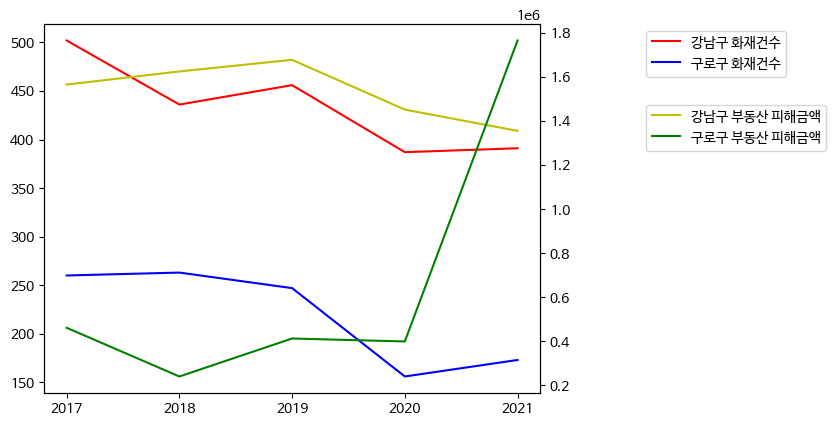

In [38]:
def fire_count(year,locate):
    df=pd.read_csv(r'data/화재발생+현황_20230710145224.csv',index_col='동별(2)')
    df.drop(columns='동별(1)',inplace=True)
    tmp=df[str(year)][str(locate)]
    return tmp

fire_count_gangnam=[]
fire_count_guro=[]
fire_price_gangnam=[]
fire_price_guro=[]

for year in range(2017,2022,1):    
    fire_count_gangnam.append(int(fire_count(year,'강남구')))
    fire_count_guro.append(int(fire_count(year,'구로구')))
    fire_price_gangnam.append(int(fire_price(year,'강남구')))
    fire_price_guro.append(int(fire_price(year,'구로구')))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(yeardata,fire_count_gangnam,label='강남구 화재건수',color='r')
ax1.plot(yeardata,fire_count_guro,label='구로구 화재건수',color='b')

ax2.plot(yeardata,fire_price_gangnam,label='강남구 부동산 피해금액',color='y')
ax2.plot(yeardata,fire_price_guro,label='구로구 부동산 피해금액',color='g')
plt.xticks(range(min(yeardata), max(yeardata)+1, 1))

ax1.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.2, 0.8))

plt.show()

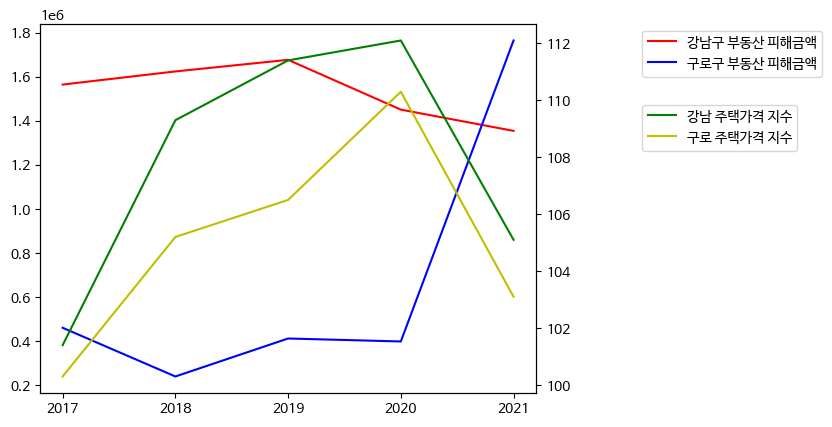

In [39]:

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.plot(yeardata,fire_price_gangnam,label='강남구 부동산 피해금액',color='r')
ax1.plot(yeardata,fire_price_guro,label='구로구 부동산 피해금액',color='b')
ax2.plot(yeardata, gangnam_house, label='강남 주택가격 지수',color='g')
ax2.plot(yeardata, guro_house, label='구로 주택가격 지수',color='y')


plt.xticks(range(min(yeardata), max(yeardata)+1, 1))

ax1.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.2, 0.8))

plt.show()

data/CARD_SUBWAY_MONTH_2015.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2015.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_74043/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 364619254
인덱스 0: 95689185
data/CARD_SUBWAY_MONTH_2016.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2016.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_74043/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 364619254
인덱스 1: 358616958
인덱스 0: 95689185
인덱스 1: 92814301
data/CARD_SUBWAY_MONTH_2017.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2017.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_74043/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 364619254
인덱스 1: 358616958
인덱스 2: 337119842
인덱스 0: 95689185
인덱스 1: 92814301
인덱스 2: 80804960
data/CARD_SUBWAY_MONTH_2018.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2018.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_74043/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 364619254
인덱스 1: 358616958
인덱스 2: 337119842
인덱스 3: 342170117
인덱스 0: 95689185
인덱스 1: 92814301
인덱스 2: 80804960
인덱스 3: 79255005
data/CARD_SUBWAY_MONTH_2019.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2019.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_74043/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 364619254
인덱스 1: 358616958
인덱스 2: 337119842
인덱스 3: 342170117
인덱스 4: 352932950
인덱스 0: 95689185
인덱스 1: 92814301
인덱스 2: 80804960
인덱스 3: 79255005
인덱스 4: 78652136
data/CARD_SUBWAY_MONTH_2020.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2020.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_74043/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 364619254
인덱스 1: 358616958
인덱스 2: 337119842
인덱스 3: 342170117
인덱스 4: 352932950
인덱스 5: 268894158
인덱스 0: 95689185
인덱스 1: 92814301
인덱스 2: 80804960
인덱스 3: 79255005
인덱스 4: 78652136
인덱스 5: 56751802
data/CARD_SUBWAY_MONTH_2021.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2021.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_74043/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 364619254
인덱스 1: 358616958
인덱스 2: 337119842
인덱스 3: 342170117
인덱스 4: 352932950
인덱스 5: 268894158
인덱스 6: 270119854
인덱스 0: 95689185
인덱스 1: 92814301
인덱스 2: 80804960
인덱스 3: 79255005
인덱스 4: 78652136
인덱스 5: 56751802
인덱스 6: 56398784
data/CARD_SUBWAY_MONTH_2022.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:76: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df1.승차총승객수 + extracted_data_df1.하차총승객수.values))


data/CARD_SUBWAY_MONTH_2022.csv


/tmp/ipykernel_74043/1510619908.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data1["지역구"] = "강남"
/tmp/ipykernel_74043/1510619908.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2["지역구"] = "구로"
/tmp/ipykernel_74043/1510619908.py:85: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tmp=(int(extracted_data_df2.승차총승객수 + extracted_data_df2.하차총승객수.values))


인덱스 0: 364619254
인덱스 1: 358616958
인덱스 2: 337119842
인덱스 3: 342170117
인덱스 4: 352932950
인덱스 5: 268894158
인덱스 6: 270119854
인덱스 7: 296722781
인덱스 0: 95689185
인덱스 1: 92814301
인덱스 2: 80804960
인덱스 3: 79255005
인덱스 4: 78652136
인덱스 5: 56751802
인덱스 6: 56398784
인덱스 7: 60743513


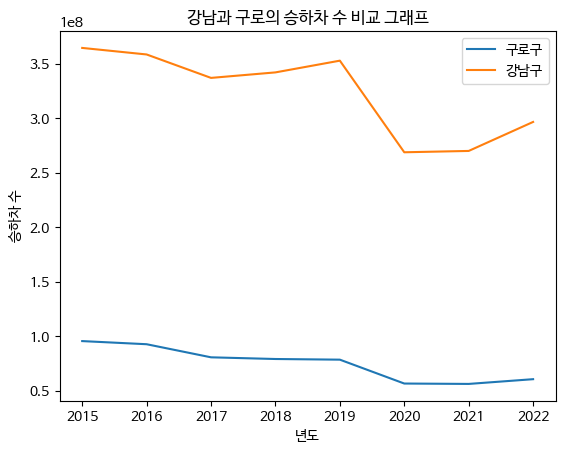

In [40]:

metro_st1 =[]
metro_st = []

def show_array_contents(array):
    for i, item in enumerate(array):
        print(f"인덱스 {i}: {item}")


def metro_tmp(tmp, array):
    array.append(tmp)
    show_array_contents(array)


for i in range (2015,2023,1):
    result = metro(i, '강남구')
    result2=metro(i,'구로구')
    metro_tmp(result, metro_st1)
    metro_tmp(result2, metro_st)
    
def create_line_chart(x, y, label):
    plt.plot(x, y, label=label)
    x = 2015


# 배열의 인덱스를 x 값으로 사용
x = range(2015, 2015 +len(metro_st))

# 선형 그래프 생성
create_line_chart(x, metro_st, label='구로구')
create_line_chart(x, metro_st1[:len(metro_st)], label='강남구')

# 그래프 레이블, 제목, 범례 설정 및 출력
plt.xlabel("년도")
plt.ylabel("승하차 수")
plt.title("강남과 구로의 승하차 수 비교 그래프")
plt.legend()

# 그래프 출력
plt.show()